In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
from lib import bitmex
from settings import API_BASE
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from arch import arch_model


In [3]:

rsi_ewma_sleep(100000, 'long.csv')


UnboundLocalError: local variable 'j' referenced before assignment

In [15]:
import argparse
import json
import csv
import sys
import time
import requests
from lib import bitmex
from settings import API_BASE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def rsi_ewma (requests, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20vwap"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            #time.sleep(2.1)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            data2 = np.append(data, data)
            query['start'] += count
            if query['start'] > requests*500:
                break
            if len(data) < count:
                break
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = df_all['close'] #close values
    vwap = pd.Series(df_all['vwap']) #volume-weighted price average
    lm = len(close)-1
    lp = len(close)+1
    l = len(close)
    rsi_len = 15
    ## RSI CLOSE ##
    change_close = pd.Series(np.zeros(l))
    gain = pd.Series(np.zeros(l))
    loss = pd.Series(np.zeros(l))
    smagain = pd.Series(np.zeros(l))
    smaloss = pd.Series(np.zeros(l))
    RS = pd.Series(np.zeros(l))
    RSIclose = pd.Series(np.zeros(l))

    alpha = 0.06 ##current optmized value
    for i in range(1,len(close)):   
        #print(close[i])
        change_close[i] = close[i]-close[i-1]
        if change_close[i] > 0:
            gain[i] = change_close[i]
        elif change_close[i] < 0:
            loss[i] = change_close[i]*-1
        elif change_close[i] == 0.00000:
            loss[i] = 0
            gain[i] = 0
        if i == rsi_len+1:   
            smagain[rsi_len+1] = gain[i-rsi_len:i].sum()/rsi_len
            smaloss[rsi_len+1] = loss[i-rsi_len:i].sum()/rsi_len
        elif i > rsi_len+1: 
            smagain[i] = alpha*gain[i] + (1-alpha)*smagain[i-1]
            smaloss[i] = alpha*loss[i] + (1-alpha)*smaloss[i-1]
            RS[i] = smagain[i]/smaloss[i]
            RSIclose[i] = 100 - 100/(1+RS[i])
               #print(RSIclose[i])
    print(RSIclose[l-1])
def rsi_ewma_sleep (trades, name, low, high):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20vwap"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            time.sleep(2.1)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            data2 = np.append(data, data)
            query['start'] += count
            if query['start'] > trades:
                break
            if len(data) < count:
                break
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = df_all['close'] #close values
    l = len(close)
    rsi_len = 15
    ## RSI CLOSE ##
    change_close = pd.Series(np.zeros(l))
    gain = pd.Series(np.zeros(l))
    loss = pd.Series(np.zeros(l))
    smagain = pd.Series(np.zeros(l))
    smaloss = pd.Series(np.zeros(l))
    RS = pd.Series(np.zeros(l))
    RSIclose = pd.Series(np.zeros(l))

    alpha = 0.06 ##current optmized value
    for i in range(1,len(close)):   
        #print(close[i])
        change_close[i] = close[i]-close[i-1]
        if change_close[i] > 0:
            gain[i] = change_close[i]
        elif change_close[i] < 0:
            loss[i] = change_close[i]*-1
        elif change_close[i] == 0.00000:
            loss[i] = 0
            gain[i] = 0
        if i == rsi_len+1:   
            smagain[rsi_len+1] = gain[i-rsi_len:i].sum()/rsi_len
            smaloss[rsi_len+1] = loss[i-rsi_len:i].sum()/rsi_len
        elif i > rsi_len+1: 
            smagain[i] = alpha*gain[i] + (1-alpha)*smagain[i-1]
            smaloss[i] = alpha*loss[i] + (1-alpha)*smaloss[i-1]
            RS[i] = smagain[i]/smaloss[i]
            RSIclose[i] = 100 - 100/(1+RS[i])
    j = 0
    k = 0
    l = len(close)
    rsi_len = 15
    L=3
    price = np.zeros((l-rsi_len, 4))
    for i in range(rsi_len+1, l):
       # print(price[i])
        if (RSIclose[i] < low and j == 0):
            j = 1
            #d = i
            price[k, 0] = close[i]
       # elif (RSIclose[i] < low and j == 0):
       #     j = j+1
       #     price[i, 0] = close[d]
        elif (RSIclose[i]>=high) and (j>=1):
            k = k+1
            j = 0
       #     f = i=
        price[k, 1] = close[i]
      #  elif (RSIclose[i]>=low) and (j>=0):
      #      price[i, 0] = close[f]
      ##  print(price[i])
      #  if (RSIclose[i] >= hiS and j == 0):
     #       j = 1
     #       price[k, 0] = close[i]
     #       price[k, 2] = 1
     ##   elif (RSIclose[i] <= loS) and (j>=1):
     #       j = 0 
     #      k = k+1
      #  price[k, 1] = close[i];
    price = np.delete(price, np.s_[k::], 0)
    #print(len(price))
    #print(price[16:30000])
    pnl = np.ones(len(price))
    pnlT = np.ones(len(price))
    for i in range(0, len(price)-1):
        pnl[i] = (1+(price[i,1]/price[i,0]-1)*L)
        if price[i,2] == 0:
            pnlT[i+1]=pnlT[i]*(1+(price[i,1]/price[i,0]-1)*L)
        else:
            pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*L)
        price[i, 3] = pnlT[i]
    plt.plot(range(0,len(price)), pnlT, label='Boys per Time')
    plt.title("Boys Club Now")
    plt.legend()
    plt.show()
    print(np.average(pnl))
    #n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)            
               #print(RSIclose[i])
def pnl2(low, high):
    l = len(close)
    rsi_len = 15
    for i in range(rsi_len+1, l):
       # print(price[i])
        if (RSIclose[i] < low and j == 0):
            j = 1
            #d = i
            price[k, 0] = close[i]
       # elif (RSIclose[i] < low and j == 0):
       #     j = j+1
       #     price[i, 0] = close[d]
        elif (RSIclose[i]>=high) and (j>=1):
            k = k+1
            j = 0
       #     f = i=
        price[k, 1] = close[i]
      #  elif (RSIclose[i]>=low) and (j>=0):
      #      price[i, 0] = close[f]
      ##  print(price[i])
      #  if (RSIclose[i] >= hiS and j == 0):
     #       j = 1
     #       price[k, 0] = close[i]
     #       price[k, 2] = 1
     ##   elif (RSIclose[i] <= loS) and (j>=1):
     #       j = 0 
     #      k = k+1
      #  price[k, 1] = close[i];
    price = np.delete(price, np.s_[k::], 0)
    #print(len(price))
    #print(price[16:30000])
    pnl = np.ones(len(price))
    pnlT = np.ones(len(price))
    for i in range(0, len(price)-1):
        pnl[i] = (1+(price[i,1]/price[i,0]-1)*L)
        pnlT[i+1] = pnlT[i]*(1+(price[i,1]/price[i,0]-1)*L)
        price[i, 3] = pnlT[i]
    plt.plot(range(0,len(price)), pnlT, label='Boys per Time')
    plt.title("Boys Club Now")
    plt.legend()
    plt.show()
    print(np.average(pnl))
    #n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
    


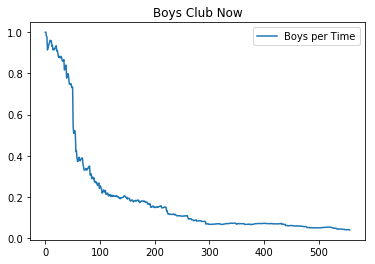

0.994599276791453


In [17]:
rsi_ewma_sleep(100000, 'name.csv', 30, 50)

NameError: name 'RSIclose' is not defined

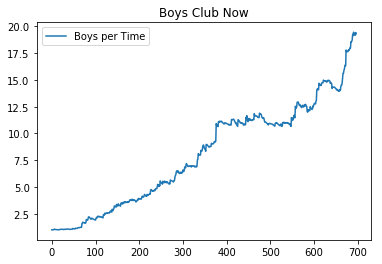

1.0045485095057318


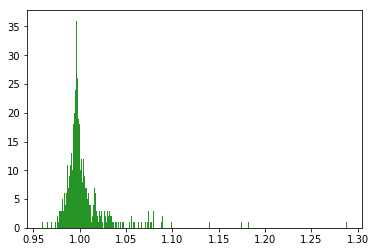

In [6]:
df1 = pd.read_csv('long.csv')
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

close = pd.Series(df_all['close']) #close values
l = len(close)
rsi_len = 15
## RSI CLOSE ##
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSIclose = pd.Series(np.zeros(l))
low = 30
high = 50
alpha = 1/15 ##current optmized value
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len+1:   
        smagain[rsi_len+1] = (gain[1:rsi_len+1].sum())/rsi_len
        smaloss[rsi_len+1] = (loss[1:rsi_len+1].sum())/rsi_len
    if i > rsi_len+1: 
        smagain[i] = alpha*gain[i] + (1-alpha)*smagain[i-1]
        smaloss[i] = alpha*loss[i] + (1-alpha)*smaloss[i-1]
        RS[i] = smagain[i]/smaloss[i]
        RSIclose[i] = 100 - 100/(1+RS[i])

j = 0
k = 0
l = len(close)
rsi_len = 15
L=3
price = np.zeros((l-rsi_len, 4))
for i in range(rsi_len+1, l):
   # print(price[i])
    if (RSIclose[i] < low and j == 0):
        j = 1
        #d = i
        price[k, 0] = close[i]
   # elif (RSIclose[i] < low and j == 0):
   #     j = j+1
   #     price[i, 0] = close[d]
    elif (RSIclose[i]>=high) and (j>=1):
        k = k+1
        j = 0
   #     f = i=
    price[k, 1] = close[i]
  #  elif (RSIclose[i]>=low) and (j>=0):
  #      price[i, 0] = close[f]
  ##  print(price[i])
  #  if (RSIclose[i] >= hiS and j == 0):
 #       j = 1
 #       price[k, 0] = close[i]
 #       price[k, 2] = 1
 ##   elif (RSIclose[i] <= loS) and (j>=1):
 #       j = 0 
 #      k = k+1
  #  price[k, 1] = close[i];
price = np.delete(price, np.s_[k::], 0)
#print(price[16:30000])
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
for i in range(0, len(price)-1):
    pnl[i] = (1+(price[i,0]/price[i,1]-1)*L)
    pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*L)
    price[i, 3] = pnlT[i]
plt.plot(range(0,len(price)), pnlT, label='Boys per Time')
plt.title("Boys Club Now")
plt.legend()
plt.show()
print(np.average(pnl))
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)            
           #print(RSIclose[i])

In [36]:
print(price)

[[1.05400000e+04 1.05090000e+04 0.00000000e+00 1.00000000e+00]
 [1.04800000e+04 1.04800000e+04 0.00000000e+00 9.91176471e-01]
 [1.05000000e+04 1.05000000e+04 0.00000000e+00 9.91176471e-01]
 ...
 [9.07200000e+03 9.07050000e+03 0.00000000e+00 4.61745095e-27]
 [9.06950000e+03 9.06650000e+03 0.00000000e+00 4.61516055e-27]
 [9.05650000e+03 9.04050000e+03 0.00000000e+00 0.00000000e+00]]
